In [2]:
# [House Prices: Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=data_description.txt)

Omer Rahamin  - 315638650 
Eden Abramovich - 323918409

Kaggle: https://www.kaggle.com/code/omerrahmin

# ABOUT THE COMPETITION
![image](https://user-images.githubusercontent.com/106242827/209784957-85ad8f23-4b31-4589-9917-ce61cb70d3c7.png)

In this competition, We were asked to build a model for predicting house prices in Ames, Iowa. I tried to predict house prices by using linear regression on different data divisions and feature selection and also by regulation. In the end, each technique was evaluated using cross-validation and the best model was chosen to predict apartment prices in the test.

# TL;DR

In this work I performed a data investigation on the data which included checking if all the examples in the columns have values and if not, I supplemented the values by mean / median of other values that appear in other examples, in addition I used sweetvi to display information on the data including graphs and correlations between features and get better vision on the features.
After testing whether the correlation to the target feature is less than 0.025 I decided to drop those features from the data.
Using a CV I performed evaluations on different models, I performed different experiments using feature selection and regularization techniques so that in the end I was able to choose the best model on which to perform the prediction for the test.

For homework 4:
We used KNN, PCA,hyperparameter search and adaboosting

#  DOWNLOADS, IMPORTS & DEFINITIONS

In [3]:
# update plotly, sweetviz version
#!pip install --upgrade plotly
#!pip uninstall -y sweetviz
#!pip install sweetviz
#!pip install -U matplotlib

In [4]:
# import numpy, matplotlib, etc.
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

# sklearn imports
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import LeavePOut
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

# DATA EXPLORATION

In [112]:
#HouseP_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
#HouseP_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
#HouseP_forLater = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

HouseP_df =pd.read_csv('data/train.csv')
HouseP_test = pd.read_csv('data/test.csv')
HouseP_forLater = pd.read_csv('data/test.csv')

ids = HouseP_test['Id']
HouseP_df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## **Data fields**

let's take a shallow look at the data and learn a little bout the features.

[Data description in competition page](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=data_description.txt)

- SalePrice - the property's sale price in dollars. This is the target variable that we're trying to predict.

- MSSubClass: The building class

- MSZoning: The general zoning classification

- LotFrontage: Linear feet of street connected to property

- LotArea: Lot size in square feet

- Street: Type of road access

- Alley: Type of alley access

- LotShape: General shape of property

- LandContour: Flatness of the property

- Utilities: Type of utilities available

- LotConfig: Lot configuration

- LandSlope: Slope of property

- Neighborhood: Physical locations within Ames city limits

- Condition1: Proximity to main road or railroad

- Condition2: Proximity to main road or railroad (if a second is present)

- BldgType: Type of dwelling

- HouseStyle: Style of dwelling

- OverallQual: Overall material and finish quality

- OverallCond: Overall condition rating

- YearBuilt: Original construction date

- YearRemodAdd: Remodel date

- RoofStyle: Type of roof

- RoofMatl: Roof material

- Exterior1st: Exterior covering on house

- Exterior2nd: Exterior covering on house (if more than one material)

- MasVnrType: Masonry veneer type

- MasVnrArea: Masonry veneer area in square feet

- ExterQual: Exterior material quality

- ExterCond: Present condition of the material on the exterior

- Foundation: Type of foundation

- BsmtQual: Height of the basement

- BsmtCond: General condition of the basement

- BsmtExposure: Walkout or garden level basement walls

- BsmtFinType1: Quality of basement finished area

- BsmtFinSF1: Type 1 finished square feet

- BsmtFinType2: Quality of second finished area (if present)

- BsmtFinSF2: Type 2 finished square feet

- BsmtUnfSF: Unfinished square feet of basement area

- TotalBsmtSF: Total square feet of basement area

- Heating: Type of heating

- HeatingQC: Heating quality and condition

- CentralAir: Central air conditioning

- Electrical: Electrical system

- 1stFlrSF: First Floor square feet

- 2ndFlrSF: Second floor square feet

- LowQualFinSF: Low quality finished square feet (all floors)

- GrLivArea: Above grade (ground) living area square feet

- BsmtFullBath: Basement full bathrooms

- BsmtHalfBath: Basement half bathrooms

- FullBath: Full bathrooms above grade

- HalfBath: Half baths above grade

- Bedroom: Number of bedrooms above basement level

- Kitchen: Number of kitchens

- KitchenQual: Kitchen quality

- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

- Functional: Home functionality rating

- Fireplaces: Number of fireplaces

- FireplaceQu: Fireplace quality

- GarageType: Garage location

- GarageYrBlt: Year garage was built

- GarageFinish: Interior finish of the garage

- GarageCars: Size of garage in car capacity

- GarageArea: Size of garage in square feet

- GarageQual: Garage quality

- GarageCond: Garage condition

- PavedDrive: Paved driveway

- WoodDeckSF: Wood deck area in square feet

- OpenPorchSF: Open porch area in square feet

- EnclosedPorch: Enclosed porch area in square feet

- 3SsnPorch: Three season porch area in square feet

- ScreenPorch: Screen porch area in square feet

- PoolArea: Pool area in square feet

- PoolQC: Pool quality

- Fence: Fence quality

- MiscFeature: Miscellaneous feature not covered in other categories

- MiscVal: $Value of miscellaneous feature

- MoSold: Month Sold

- YrSold: Year Sold

- SaleType: Type of sale

- SaleCondition: Condition of sale

In [113]:
# show train info
HouseP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## DATA PROFILING

From this report we can learn:

*   How much missing value we have in every column, that can help us drop some features (will be shown later again).
*   The number of unique values in every column and the distribution between the values, that can help us drop some features.
*   The correlation between every feature and the rest of the features. (will be shown later as a heatmap, but this way is ordered by the correlation strength and we can easily focus on one feature).
*  In each feature we can learn the mean and the median values, and the min and max values as well.



In [114]:
# count empty values in each column
def count_empty_values_in_each_column(df: pd.DataFrame):
    print('empty values')
    print('------------\n')

    empty_columns = []
    for col in df.columns:
        empty = df[col].isna().sum()
        if empty != 0:
            empty_columns.append(col)
            print(f"{col}: {empty}")

    return empty_columns

# check the number of empty columns in train
train_empty_columns = count_empty_values_in_each_column(HouseP_df)

empty values
------------

LotFrontage: 259
Alley: 1369
MasVnrType: 872
MasVnrArea: 8
BsmtQual: 37
BsmtCond: 37
BsmtExposure: 38
BsmtFinType1: 37
BsmtFinType2: 38
Electrical: 1
FireplaceQu: 690
GarageType: 81
GarageYrBlt: 81
GarageFinish: 81
GarageQual: 81
GarageCond: 81
PoolQC: 1453
Fence: 1179
MiscFeature: 1406


In [115]:
#now we will drop some of the columns to make the deep investigation more focused
#ID will be droped because it's unnecessary.
#Street and Utilities will be droped because they are seems to be not so helpful (only two distinct vals and the distrebution is 99%-1%)
# and the rest has too many missing values
columns_to_drop = ['Id', 'Street' , 'Utilities', 'Alley', 'PoolQC', 'Fence', 'MiscFeature','FireplaceQu']
HouseP_df.drop(columns_to_drop, axis=1, inplace=True)
HouseP_test.drop(columns_to_drop, axis=1, inplace=True)

In [116]:
# display the Dtype of each empty column in train
pd.DataFrame(HouseP_df, columns=train_empty_columns).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         0 non-null      float64
 2   MasVnrType    588 non-null    object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   0 non-null      float64
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        0 non-null      float64
 17  Fence         0 non-null      float64
 18  MiscFeature   0 non-null    

## Filling the missing values

In [117]:
# fill empty values by median value for each column in the dataframe
def fill_na_median(df, column_names):
    for column_name in column_names:
        df_not_null = df[~df[column_name].isnull()]
        df[column_name].fillna(df_not_null[column_name].median(), inplace=True)

# fill empty values by mean value for each column in the dataframe
def fill_na_mean(df, column_names):
    for column_name in column_names:
        df_not_null = df[~df[column_name].isnull()]
        df[column_name].fillna(df_not_null[column_name].mean(), inplace=True)

# fill empty values by mode value for each column in the dataframe
def fill_na_mode(df, column_names):
    for column_name in column_names:
        df[column_name].fillna(df[column_name].mode()[0], inplace=True)

In [118]:
# fill empty values in train dataframe
fill_na_median(HouseP_df, ['LotFrontage', 'GarageYrBlt'])
fill_na_mean(HouseP_df, ['MasVnrArea'])
fill_na_mode(HouseP_df, ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'])

HouseP_df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Reg,Lvl,Inside,Gtl,Gilbert,Norm,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Reg,Lvl,Inside,Gtl,NWAmes,Norm,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Reg,Lvl,Inside,Gtl,Crawfor,Norm,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Reg,Lvl,Inside,Gtl,NAmes,Norm,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [119]:
#now we will do the same for the test df
# check if there is empty columns in test
test_empty_columns = count_empty_values_in_each_column(HouseP_test)

empty values
------------

MSZoning: 4
LotFrontage: 227
Exterior1st: 1
Exterior2nd: 1
MasVnrType: 894
MasVnrArea: 15
BsmtQual: 44
BsmtCond: 45
BsmtExposure: 44
BsmtFinType1: 42
BsmtFinSF1: 1
BsmtFinType2: 42
BsmtFinSF2: 1
BsmtUnfSF: 1
TotalBsmtSF: 1
BsmtFullBath: 2
BsmtHalfBath: 2
KitchenQual: 1
Functional: 2
GarageType: 76
GarageYrBlt: 78
GarageFinish: 78
GarageCars: 1
GarageArea: 1
GarageQual: 78
GarageCond: 78
SaleType: 1


In [120]:
# display the Dtype of each empty column in test
pd.DataFrame(HouseP_test, columns=test_empty_columns).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1455 non-null   object 
 1   LotFrontage   1232 non-null   float64
 2   Exterior1st   1458 non-null   object 
 3   Exterior2nd   1458 non-null   object 
 4   MasVnrType    565 non-null    object 
 5   MasVnrArea    1444 non-null   float64
 6   BsmtQual      1415 non-null   object 
 7   BsmtCond      1414 non-null   object 
 8   BsmtExposure  1415 non-null   object 
 9   BsmtFinType1  1417 non-null   object 
 10  BsmtFinSF1    1458 non-null   float64
 11  BsmtFinType2  1417 non-null   object 
 12  BsmtFinSF2    1458 non-null   float64
 13  BsmtUnfSF     1458 non-null   float64
 14  TotalBsmtSF   1458 non-null   float64
 15  BsmtFullBath  1457 non-null   float64
 16  BsmtHalfBath  1457 non-null   float64
 17  KitchenQual   1458 non-null   object 
 18  Functional    1457 non-null 

In [121]:
# fill empty values in test dataframe
fill_na_median(HouseP_test, ['LotFrontage', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars'])
fill_na_mean(HouseP_test, ['MasVnrArea', 'GarageArea'])
fill_na_mode(HouseP_test, ['MSZoning', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType'])

## Correlation Heatmap
After we have checked and completed all the missing values in the dataframe we can continue to check the correlation between the features and the target SalePrice.

In [122]:
# # display heatmap of train
# plt.figure(figsize=(24,20))
# cor = abs(HouseP_df.corr())
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, vmin=0, vmax=1)
# plt.show()

In [123]:
# # find the low correlation features to SalePrice
# low_correlation_features=cor[cor['SalePrice'] < 0.025].index # tried droping 0.05,0.1,0.025
# low_correlation_features

In [124]:
# # drop low corrlations features from train and test
# HouseP_df.drop(low_correlation_features, axis=1, inplace=True)
# HouseP_test.drop(low_correlation_features, axis=1, inplace=True)

# CROSS VALIDATION

In [125]:
# divide the data to features and target
t = HouseP_df['SalePrice'].copy()
X = HouseP_df.drop(['SalePrice'], axis=1)
print('t')
display(t)
print()
print('X')
display(X)

t


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


X


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Reg,Lvl,Inside,Gtl,Gilbert,Norm,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Reg,Lvl,Inside,Gtl,NWAmes,Norm,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Reg,Lvl,Inside,Gtl,Crawfor,Norm,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Reg,Lvl,Inside,Gtl,NAmes,Norm,...,0,112,0,0,0,0,4,2010,WD,Normal


In [126]:
# determine categorical and numerical features
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

print('Numerical Cols:', numerical_cols, 'size:', len(numerical_cols))
print('Categorical Cols:', categorical_cols, 'size:', len(categorical_cols))

Numerical Cols: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object') size: 36
Categorical Cols: Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
   

In [127]:
# use column transformer to insert different transformers for each column
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([
    ("encoding", OrdinalEncoder(), categorical_cols),
    ("standard", MinMaxScaler(), numerical_cols)])

X_encoded = pd.DataFrame(ct.fit_transform(X, t), columns=all_cols)
test_encoded = pd.DataFrame(ct.fit_transform(HouseP_test), columns=all_cols)

print("X encoded")
display(X_encoded)
print("test encoded")
display(test_encoded)

X encoded


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,3.0,3.0,3.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,...,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.50
1,3.0,3.0,3.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,...,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.25
2,3.0,0.0,3.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,...,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.50
3,3.0,0.0,3.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,...,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.00
4,3.0,0.0,3.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,...,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3.0,3.0,3.0,4.0,0.0,8.0,2.0,2.0,0.0,5.0,...,0.324401,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.636364,0.25
1456,3.0,3.0,3.0,4.0,0.0,14.0,2.0,2.0,0.0,2.0,...,0.352609,0.407235,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.090909,1.00
1457,3.0,3.0,3.0,4.0,0.0,6.0,2.0,2.0,0.0,5.0,...,0.177715,0.000000,0.109689,0.000000,0.0,0.0,0.0,0.16129,0.363636,1.00
1458,3.0,3.0,3.0,4.0,0.0,12.0,2.0,2.0,0.0,2.0,...,0.169252,0.427071,0.000000,0.202899,0.0,0.0,0.0,0.00000,0.272727,1.00


test encoded


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,2.0,3.0,3.0,4.0,0.0,12.0,1.0,2.0,0.0,2.0,...,0.490591,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.000000,0.454545,1.0
1,3.0,0.0,3.0,0.0,0.0,12.0,2.0,2.0,0.0,2.0,...,0.209677,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.735294,0.454545,1.0
2,3.0,0.0,3.0,4.0,0.0,8.0,2.0,2.0,0.0,4.0,...,0.323925,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.000000,0.181818,1.0
3,3.0,0.0,3.0,4.0,0.0,8.0,2.0,2.0,0.0,4.0,...,0.315860,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.000000,0.454545,1.0
4,3.0,0.0,1.0,4.0,0.0,22.0,2.0,2.0,4.0,2.0,...,0.340054,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4.0,3.0,3.0,4.0,0.0,10.0,2.0,2.0,3.0,4.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.454545,0.0
1455,4.0,3.0,3.0,4.0,0.0,10.0,2.0,2.0,4.0,4.0,...,0.192204,0.000000,0.032345,0.0,0.0,0.000000,0.0,0.000000,0.272727,0.0
1456,3.0,3.0,3.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,...,0.387097,0.332865,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.727273,0.0
1457,3.0,3.0,3.0,4.0,0.0,11.0,2.0,2.0,0.0,5.0,...,0.000000,0.056180,0.043127,0.0,0.0,0.000000,0.0,0.041176,0.545455,0.0


# FEATURE SELECTION

I've tried running:

1.n_splits=5 , n_repeats = 10 , k=10 , correlation threshold = 0.05 #0.22146

2.n_splits=5 , n_repeats = 10 , p=1 but it takes days!!! so I interupted the execution

3.n_splits=2 , n_repeats = 5 , p=1 but it takes 5 Hours! so I interupted the execution

4.n_splits=2 , n_repeats = 2 , p=1 but it takes 2 Hours! so I interupted the execution

5.n_splits=2 , n_repeats = 1 , p=1 but it takes 1 Hours!(but it runs twice) so I interupted the execution

6.n_splits=5 , n_repeats = 5 , k=5 , correlation threshold = 0.05 #0.22146

7.n_splits=5 , n_repeats = 5 , k=5 , correlation threshold = 0.1 #0.48464

8.n_splits=5 , n_repeats = 5 , k=5 , correlation threshold = 0.025 #0.19003

9.n_splits=7 , n_repeats = 7 , k=4 , correlation threshold = 0.025 #0.19763


10.n_splits=4 , n_repeats = 4 , k=20 , correlation threshold = 0.025 ##0.19003

In [128]:
# find best subset of features on this dataset with SGDRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold

selector_sgd = RFECV(SGDRegressor(random_state=1), cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)).fit(X_encoded, t)
X_selected_features_sgd = X_encoded.loc[:, selector_sgd.support_]
display(X_selected_features_sgd)

KeyboardInterrupt: 

In [ ]:
# find best subset of features on this dataset with LinearRegression
selector_lr = RFECV(LinearRegression(), cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)).fit(X_encoded, t)
X_selected_features_lr = X_encoded.loc[:, selector_lr.support_]
display(X_selected_features_lr)

,MSSubClass,LotFrontage,LotShape,LandSlope,BldgType,OverallCond,YearBuilt,RoofMatl,Exterior1st,Exterior2nd,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,3.0,3.0,0.0,2.0,1.0,1.0,2.0,2.0,3.0,3.0,...,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.50
1,3.0,3.0,0.0,2.0,1.0,1.0,3.0,2.0,3.0,1.0,...,0.50,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.25
2,3.0,3.0,0.0,2.0,1.0,1.0,2.0,2.0,3.0,2.0,...,0.50,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.50
3,3.0,3.0,0.0,2.0,1.0,1.0,3.0,3.0,1.0,3.0,...,0.75,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.00
4,3.0,3.0,0.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,...,0.75,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3.0,3.0,0.0,2.0,1.0,1.0,3.0,2.0,3.0,3.0,...,0.50,0.324401,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.25
1456,3.0,3.0,0.0,2.0,1.0,2.0,3.0,2.0,3.0,3.0,...,0.50,0.352609,0.407235,0.000000,0.000000,0.0,0.0,0.0,0.00000,1.00
1457,3.0,3.0,0.0,2.0,1.0,1.0,0.0,3.0,1.0,3.0,...,0.25,0.177715,0.000000,0.109689,0.000000,0.0,0.0,0.0,0.16129,1.00
1458,3.0,3.0,0.0,2.0,1.0,1.0,3.0,3.0,3.0,2.0,...,0.25,0.169252,0.427071,0.000000,0.202899,0.0,0.0,0.0,0.00000,1.00


In [ ]:
def evaluate_model(X, model):
    val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, model, k=5, show_score_loss_graphs=True)
    print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
    print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

In [ ]:
# calculate score and loss from cv (KFold or LPO) and display graphs
from tqdm.auto import tqdm
def get_cv_score_and_loss(X, t, model, k=None, p=None, show_score_loss_graphs=False, use_pbar=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=1)
    elif p is not None:
        cv = LeavePOut(p)
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')

    if use_pbar:
        pbar = tqdm(desc='Computing Models', total=cv.get_n_splits(X))

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), mean_squared_error(t_train, y_train, squared=False)]
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), mean_squared_error(t_val, y_val, squared=False)]

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        fig.show()

    return mean_val_score, mean_val_loss, mean_train_score, mean_train_loss

In [ ]:
print('SGDRegressor')
evaluate_model(X_selected_features_sgd, selector_sgd)

print('LinearRegression')
evaluate_model(X_selected_features_lr, selector_lr)

SGDRegressor


Computing Models: 100%|██████████| 5/5 [01:01<00:00, 12.39s/it]


mean cv val score: 0.81
mean cv val loss 34701.04
mean cv val score: 0.82
mean cv val loss 33496.84
LinearRegression


Computing Models: 100%|██████████| 5/5 [00:14<00:00,  2.98s/it]


mean cv val score: 0.80
mean cv val loss 34824.53
mean cv val score: 0.85
mean cv val loss 30808.34


We can see that the val loss on selector_lr is greater than in selector_sgd so we will use the features that the selector_sgd model chose as best and now we can make regularization techniques to check ​if there will be improvement.

# REGULARIZATION

In [ ]:
# train with grid search and get best parameters
from sklearn.model_selection import GridSearchCV

hyper_parameters = {'penalty': ('l2', 'l1', 'elasticnet'), 'alpha': [0.0001, 0.001, 0.01, 0.1], 'eta0': [0.001, 0.005, 0.01, 0.1, 0.25]}
gs_model = GridSearchCV(SGDRegressor(random_state=1), hyper_parameters).fit(X_selected_features_sgd, t)
print('best params', gs_model.best_params_)

best params {'alpha': 0.0001, 'eta0': 0.01, 'penalty': 'l1'}


In [ ]:
# train with random search and get best parameters
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

np.random.seed(1)
distributions = dict(alpha=uniform(loc=0, scale=1), penalty=['l2', 'l1', 'elasticnet'], eta0=[0.001, 0.005, 0.01, 0.1, 0.25])
rs_model = RandomizedSearchCV(SGDRegressor(), distributions, random_state=1).fit(X_selected_features_sgd, t)
print('best params', rs_model.best_params_)

best params {'alpha': np.float64(0.8007445686755367), 'eta0': 0.005, 'penalty': 'l1'}


In [ ]:
print('GridSearchCV')
evaluate_model(X_selected_features_sgd, gs_model)

print('RandomizedSearchCV')
evaluate_model(X_selected_features_sgd, rs_model)

GridSearchCV


Computing Models:  20%|██        | 1/5 [00:09<00:38,  9.61s/it]

KeyboardInterrupt: 

# Results

After the regularization on the seleceted features we can see that there is no real improvment on the model so we will take the selector_sgd model to predict the test.

In [ ]:
# Create the selected model to predict the test
myModel = RFECV(SGDRegressor(random_state=1), cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)).fit(X_encoded, t)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors = 5)
evaluate_model(X_encoded, model)

Computing Models: 100%|██████████| 5/5 [00:00<00:00,  9.16it/s]


mean cv val score: 0.61
mean cv val loss 49331.20
mean cv val score: 0.74
mean cv val loss 40483.58


We think that KNN fits the best for this specific problem since most houses should give good results depending on houses that are close to them in parameters.

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols = X_1_word_2_pca.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_1_word_2_pca.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X_1_word_2_pca.columns)

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'),
     categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])

model_pipe = make_pipeline(ct, KNeighborsRegressor(n_neighbors = 5))

val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X_1_word_2_pca, t,
                       model_pipe,
                       k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

Need to apply CT on X_1_word_2_pca since otherwise it gives some really random scores, it seems that it did increase the predictions quite a lot.

# Exercise 4

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

X_train, X_test, y_train, y_test = train_test_split(X_encoded, t, test_size=0.2, random_state=42)



We will use a popular implementation of LWLR by GeeksForGeeks:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.base import BaseEstimator
import numpy as np
import sys


class LWLR(BaseEstimator):
    """
    A demo of Local Weight Linear Regression, 
    refer to https://www.geeksforgeeks.org/ml-locally-weighted-linear-regression/
    """
    def __init__(self,k):
        """
        The hyper parameter k controls the weighting effect for samples
        """
        self.k = k
    
    def fit(self,X,y):
        """
        Non-parametric method, memorize training samples X and targets y
        """
        self.X = X
        self.y = y
        return self
        
    def predict(self, X):
        """
        Given feature vectors X, make prediction
        """
        result = []
        for example in X:
            prediction = self._predict_single(example)
            result.append(prediction)
            
        return np.array(result)
        
    def _predict_single(self, X_in):
        """
        Train and predict for a sinlge input feature vector X_in
        """
        # compute weights
        weights = np.exp(-np.sum(np.square(self.X - X_in), axis=1)/(2*self.k))
        
        # fit linear regression model on weighted samples
        lr = LinearRegression().fit(self.X, self.y, sample_weight=weights)
        
        # make prediction
        return lr.predict(X_in.reshape(1,-1))
    
    
def search_best_k(X, y, n_folds=10, k_range=[1], scoring="neg_mean_squared_log_error"):
    """
    Search best k given a list of candidate ks
    n_folds: the number of CV split
    k_range: list of candidate ks
    scoring: sklearn acceptable scoring object or strings for model selection
    Return: tuple of (the best k, cv history)
    """
    np.random.seed(999)
    results = []
    best_k, best_score = 0, -sys.maxsize
    for k in k_range:
        scores = cross_validate(LWLR(k), X, y, cv=10, scoring=scoring, n_jobs=-1, return_train_score=True)
        avg_train_score = np.mean(scores['train_score'])
        avg_test_score = np.mean(scores["test_score"])
        results.append({"k":k, "avg_train_score":avg_train_score, "avg_test_score":avg_test_score})
        if best_score < avg_test_score:
            best_k, best_score = k, avg_test_score
        print(results[-1])
    return best_k, results
    
def score(self, X, y):
        y_pred = self.predict(X)
        return r2_score(y, y_pred)

In [ ]:
def evaluate_model_performance(model, X_test, y_test):
    """
    Evaluates the performance of a given model using RMSE and R² metrics.

    Parameters:
    - model: Trained model to evaluate.
    - X_test: Test features.
    - y_test: True labels for the test data.

    Returns:
    - rmse: Root Mean Squared Error.
    - r2: R² Score.
    """
    # Predict the target variable using the model
    y_pred = model.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Calculate R² score
    r2 = r2_score(y_test, y_pred)
    
    return rmse, r2




In [132]:

# Define the model and the hyperparameters to search

knn = KNeighborsRegressor()
param_grid_knn = {'n_neighbors': list(range(1, 20))}

# Define the scorer
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform GridSearchCV
gscv_knn = GridSearchCV(knn, param_grid_knn, scoring=scorer, cv=5)
gscv_knn.fit(X_train, y_train)

# Evaluate the best model
rmse_knn, r2_knn = evaluate_model_performance(gscv_knn.best_estimator_, X_test, y_test)
print(f"KNN - Best RMSE: {rmse_knn:.2f}")
print(f"KNN - Best R²: {r2_knn:.4f}")
print(f"KNN - Best Parameters: {gscv_knn.best_params_}")

KNN - Best RMSE: 52330.61
KNN - Best R²: 0.6430
KNN - Best Parameters: {'n_neighbors': 10}


In [133]:

# Define the model and the hyperparameters to search
dt = DecisionTreeRegressor(random_state=42)
param_grid_dt = {
    'max_depth': list(range(1, 20)),
    'min_samples_split': list(range(2, 10)),
    'min_samples_leaf': list(range(1, 5))
}

# Perform GridSearchCV
gscv_dt = GridSearchCV(dt, param_grid_dt, scoring=scorer, cv=5)
gscv_dt.fit(X_train, y_train)

# Evaluate the best model
rmse_dt, r2_dt = evaluate_model_performance(gscv_dt.best_estimator_, X_test, y_test)
print(f"Decision Tree - Best RMSE: {rmse_dt:.2f}")
print(f"Decision Tree - Best R²: {r2_dt:.4f}")
print(f"Decision Tree - Best Parameters: {gscv_dt.best_params_}")

Decision Tree - Best RMSE: 35699.65
Decision Tree - Best R²: 0.8338
Decision Tree - Best Parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [134]:

# Define the model and the hyperparameters to search
svr = SVR()
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'degree': [2, 3]
}

# Perform GridSearchCV
gscv_svr = GridSearchCV(svr, param_grid_svr, scoring=scorer, cv=5)
gscv_svr.fit(X_train, y_train)

# Evaluate the best model
rmse_svr, r2_svr = evaluate_model_performance(gscv_svr.best_estimator_, X_test, y_test)
print(f"SVR - Best RMSE: {rmse_svr:.2f}")
print(f"SVR - Best R²: {r2_svr:.4f}")
print(f"SVR - Best Parameters: {gscv_svr.best_params_}")

SVR - Best RMSE: 52007.17
SVR - Best R²: 0.6474
SVR - Best Parameters: {'C': 100, 'degree': 2, 'kernel': 'linear'}


In [135]:
# Define the model and the hyperparameters to search
ada = AdaBoostRegressor(random_state=42)
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# Perform GridSearchCV
gscv_ada = GridSearchCV(ada, param_grid_ada, scoring=scorer, cv=5)
gscv_ada.fit(X_train, y_train)

# Evaluate the best model
rmse_ada, r2_ada = evaluate_model_performance(gscv_ada.best_estimator_, X_test, y_test)
print(f"AdaBoost - Best RMSE: {rmse_ada:.2f}")
print(f"AdaBoost - Best R²: {r2_ada:.4f}")
print(f"AdaBoost - Best Parameters: {gscv_ada.best_params_}")

AdaBoost - Best RMSE: 33395.33
AdaBoost - Best R²: 0.8546
AdaBoost - Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}


In [136]:
# Define the hyperparameters to search
param_grid_lwlr = {'k': list(range(1, 20))}
arr_X_train = np.asarray(X_train)
arr_X_test = np.asarray(X_test)

# Perform GridSearchCV
gscv_lwlr = GridSearchCV(LWLR(k=1), param_grid_lwlr, scoring=scorer, cv=5)
gscv_lwlr.fit(X_train, y_train)

# Evaluate the best model
rmse_lwlr, r2_lwlr = evaluate_model_performance(gscv_lwlr.best_estimator_, arr_X_test, y_test)
print(f"LWLR - Best RMSE: {rmse_lwlr:.2f}")
print(f"LWLR - Best R²: {r2_lwlr:.4f}")
print(f"LWLR - Best Parameters: {gscv_lwlr.best_params_}")

LWLR - Best RMSE: 93366.34
LWLR - Best R²: -0.1365
LWLR - Best Parameters: {'k': 1}


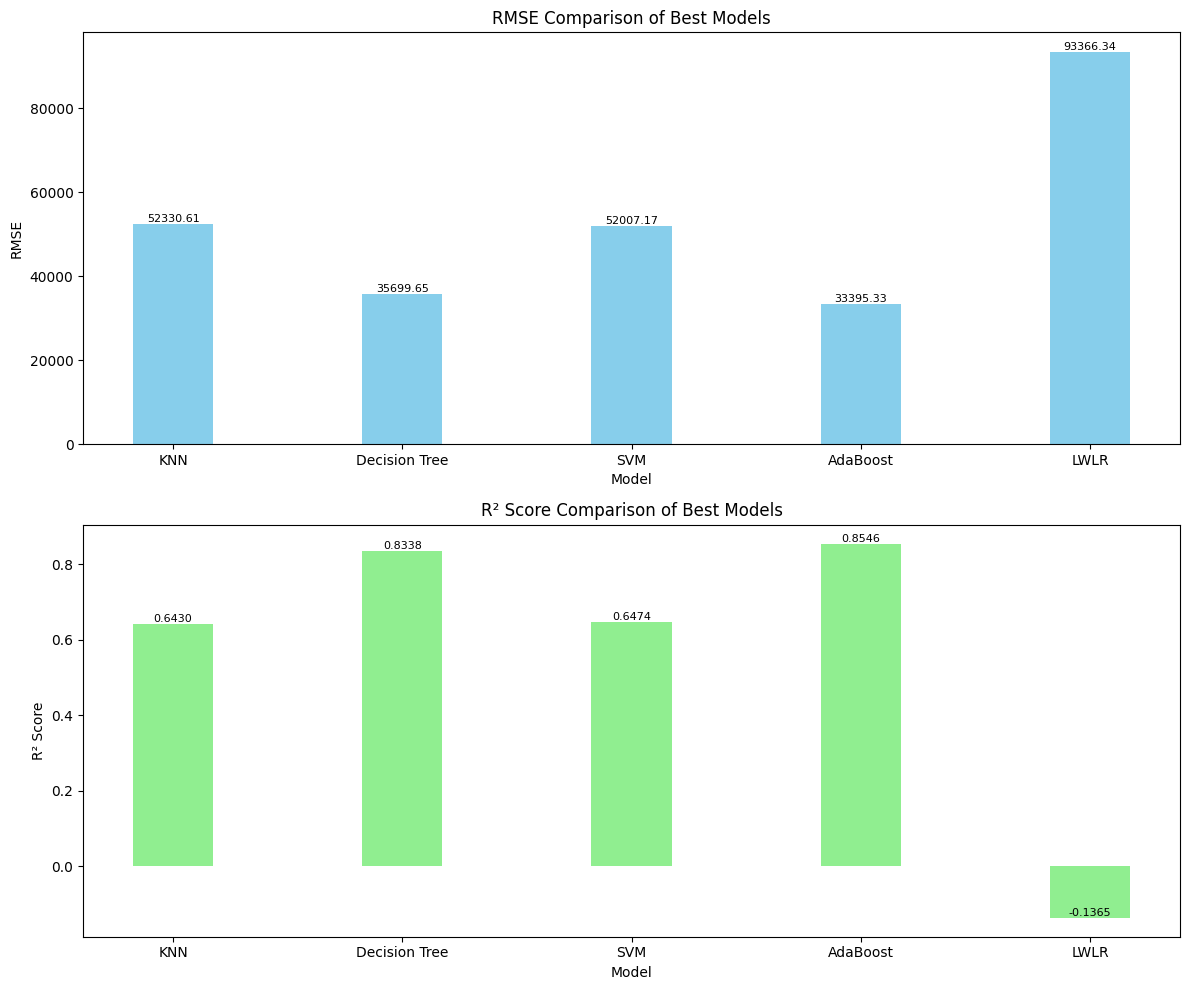

In [137]:
models = ['KNN', 'Decision Tree', 'SVM', 'AdaBoost', 'LWLR']
rmse_values = [rmse_knn,rmse_dt,rmse_svr,rmse_ada,rmse_lwlr]  # Replace with actual RMSE values
r2_values = [r2_knn, r2_dt, r2_svr, r2_ada, r2_lwlr]        # Replace with actual R² values

# Set up the bar width and positions
bar_width = 0.35
index = np.arange(len(models))

# Plotting RMSE comparison
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# RMSE Bar plots
bars_rmse = ax[0].bar(index, rmse_values, bar_width, color='skyblue')

# Add values above RMSE bars
for bar in bars_rmse:
    height = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom', fontsize=8)

# Add labels and title to the RMSE plot
ax[0].set_xlabel('Model')
ax[0].set_ylabel('RMSE')
ax[0].set_title('RMSE Comparison of Best Models')
ax[0].set_xticks(index)
ax[0].set_xticklabels(models)

# R² Bar plots
bars_r2 = ax[1].bar(index, r2_values, bar_width, color='lightgreen')

# Add values above R² bars
for bar in bars_r2:
    height = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom', fontsize=8)

# Add labels and title to the R² plot
ax[1].set_xlabel('Model')
ax[1].set_ylabel('R² Score')
ax[1].set_title('R² Score Comparison of Best Models')
ax[1].set_xticks(index)
ax[1].set_xticklabels(models)

# Display the plots
plt.tight_layout()
plt.show()

### Explanation:
* AdaBoost is the best performing model overall, with the lowest RMSE and highest R², suggesting it is the most accurate in predicting house prices.<br>
* Decision Tree also performs well, with a low RMSE and high R², making it a strong model.<br>
* KNN and SVM have moderate performance, with similar RMSE and R² scores, indicating that they are less effective than Decision Tree and AdaBoost but better than LWLR.<br>
* LWLR shows the worst performance, with a very high RMSE and very low R², indicating that it struggles to model the data effectively in this context.<br>
* These results suggest that AdaBoost would be the best choice for this particular regression task, with Decision Tree as a strong alternative.<br>

# PCA

In [138]:
from sklearn.decomposition import PCA

# Initialize PCA to retain 95% of the variance
pca = PCA(n_components=0.95)

# Fit PCA on the training data and transform both the training and test data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [139]:
# Explained variance by each component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by each component:", explained_variance)

# Total explained variance
total_explained_variance = np.sum(explained_variance)
print("Total Explained Variance:", total_explained_variance)
print(f'Original number of features: {X_train.shape[1]}')
print(f'Reduced number of features after PCA: {X_train_pca.shape[1]}')

Explained Variance by each component: [0.38362499 0.22285473 0.05653831 0.03812925 0.03579985 0.03180202
 0.02792531 0.02456502 0.01846805 0.01740218 0.01476916 0.01289774
 0.01110772 0.01006973 0.00985885 0.00893858 0.00830367 0.00767568
 0.00649089 0.00636675]
Total Explained Variance: 0.9535884738490931
Original number of features: 72
Reduced number of features after PCA: 20


### Training the models after PCA

In [140]:
# Define the model and the hyperparameters to search
knn = KNeighborsRegressor()
param_grid_knn = {'n_neighbors': list(range(1, 20))}

# Perform GridSearchCV
gscv_knn_pca = GridSearchCV(knn, param_grid_knn, scoring='neg_mean_squared_error', cv=5)
gscv_knn_pca.fit(X_train_pca, y_train)

# Evaluate the best model
rmse_knn_pca, r2_knn_pca = evaluate_model_performance(gscv_knn_pca.best_estimator_, X_test_pca, y_test)
print(f"KNN (PCA) - Best RMSE: {rmse_knn_pca:.2f}")
print(f"KNN (PCA) - Best R²: {r2_knn_pca:.4f}")
print(f"KNN (PCA) - Best Parameters: {gscv_knn.best_params_}")

KNN (PCA) - Best RMSE: 52411.97
KNN (PCA) - Best R²: 0.6419
KNN (PCA) - Best Parameters: {'n_neighbors': 10}


In [141]:
# Define the model and the hyperparameters to search
dt = DecisionTreeRegressor(random_state=42)
param_grid_dt = {
    'max_depth': list(range(1, 20)),
    'min_samples_split': list(range(2, 10)),
    'min_samples_leaf': list(range(1, 5))
}

# Perform GridSearchCV
gscv_dt_pca = GridSearchCV(dt, param_grid_dt, scoring='neg_mean_squared_error', cv=5)
gscv_dt_pca.fit(X_train_pca, y_train)

# Evaluate the best model
rmse_dt_pca, r2_dt_pca = evaluate_model_performance(gscv_dt_pca.best_estimator_, X_test_pca, y_test)
print(f"Decision Tree (PCA) - Best RMSE: {rmse_dt_pca:.2f}")
print(f"Decision Tree (PCA) - Best R²: {r2_dt_pca:.4f}")
print(f"Decision Tree (PCA) - Best Parameters: {gscv_dt_pca.best_params_}")

Decision Tree (PCA) - Best RMSE: 61643.08
Decision Tree (PCA) - Best R²: 0.5046
Decision Tree (PCA) - Best Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [142]:
# Define the model and the hyperparameters to search
svr = SVR()
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'degree': [2, 3]
}

# Perform GridSearchCV
gscv_svr_pca = GridSearchCV(svr, param_grid_svr, scoring='neg_mean_squared_error', cv=5)
gscv_svr_pca.fit(X_train_pca, y_train)

# Evaluate the best model
rmse_svr_pca, r2_svr_pca = evaluate_model_performance(gscv_svr_pca.best_estimator_, X_test_pca, y_test)
print(f"SVR (PCA) - Best RMSE: {rmse_svr_pca:.2f}")
print(f"SVR (PCA) - Best R²: {r2_svr_pca:.4f}")
print(f"SVR (PCA) - Best Parameters: {gscv_svr_pca.best_params_}")

SVR (PCA) - Best RMSE: 55902.93
SVR (PCA) - Best R²: 0.5926
SVR (PCA) - Best Parameters: {'C': 100, 'degree': 2, 'kernel': 'linear'}


In [143]:
# Define the model and the hyperparameters to search
ada = AdaBoostRegressor(random_state=42)
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# Perform GridSearchCV
gscv_ada_pca = GridSearchCV(ada, param_grid_ada, scoring='neg_mean_squared_error', cv=5)
gscv_ada_pca.fit(X_train_pca, y_train)

# Evaluate the best model
rmse_ada_pca, r2_ada_pca = evaluate_model_performance(gscv_ada_pca.best_estimator_, X_test_pca, y_test)
print(f"AdaBoost (PCA) - Best RMSE: {rmse_ada_pca:.2f}")
print(f"AdaBoost (PCA) - Best R²: {r2_ada_pca:.4f}")
print(f"AdaBoost (PCA) - Best Parameters: {gscv_ada_pca.best_params_}")

AdaBoost (PCA) - Best RMSE: 54642.22
AdaBoost (PCA) - Best R²: 0.6107
AdaBoost (PCA) - Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}


In [144]:
# Define the hyperparameters to search
param_grid_lwlr = {'k': list(range(1, 20))}

# Perform GridSearchCV
gscv_lwlr_pca = GridSearchCV(LWLR(k=1), param_grid_lwlr, scoring='neg_mean_squared_error', cv=5)
gscv_lwlr_pca.fit(X_train_pca, y_train)

# Evaluate the best model
rmse_lwlr_pca, r2_lwlr_pca = evaluate_model_performance(gscv_lwlr_pca.best_estimator_, X_test_pca, y_test)
print(f"LWLR (PCA) - Best RMSE: {rmse_lwlr_pca:.2f}")
print(f"LWLR (PCA) - Best R²: {r2_lwlr_pca:.4f}")
print(f"LWLR (PCA) - Best Parameters: {gscv_lwlr_pca.best_params_}")

LWLR (PCA) - Best RMSE: 46467.95
LWLR (PCA) - Best R²: 0.7185
LWLR (PCA) - Best Parameters: {'k': 19}


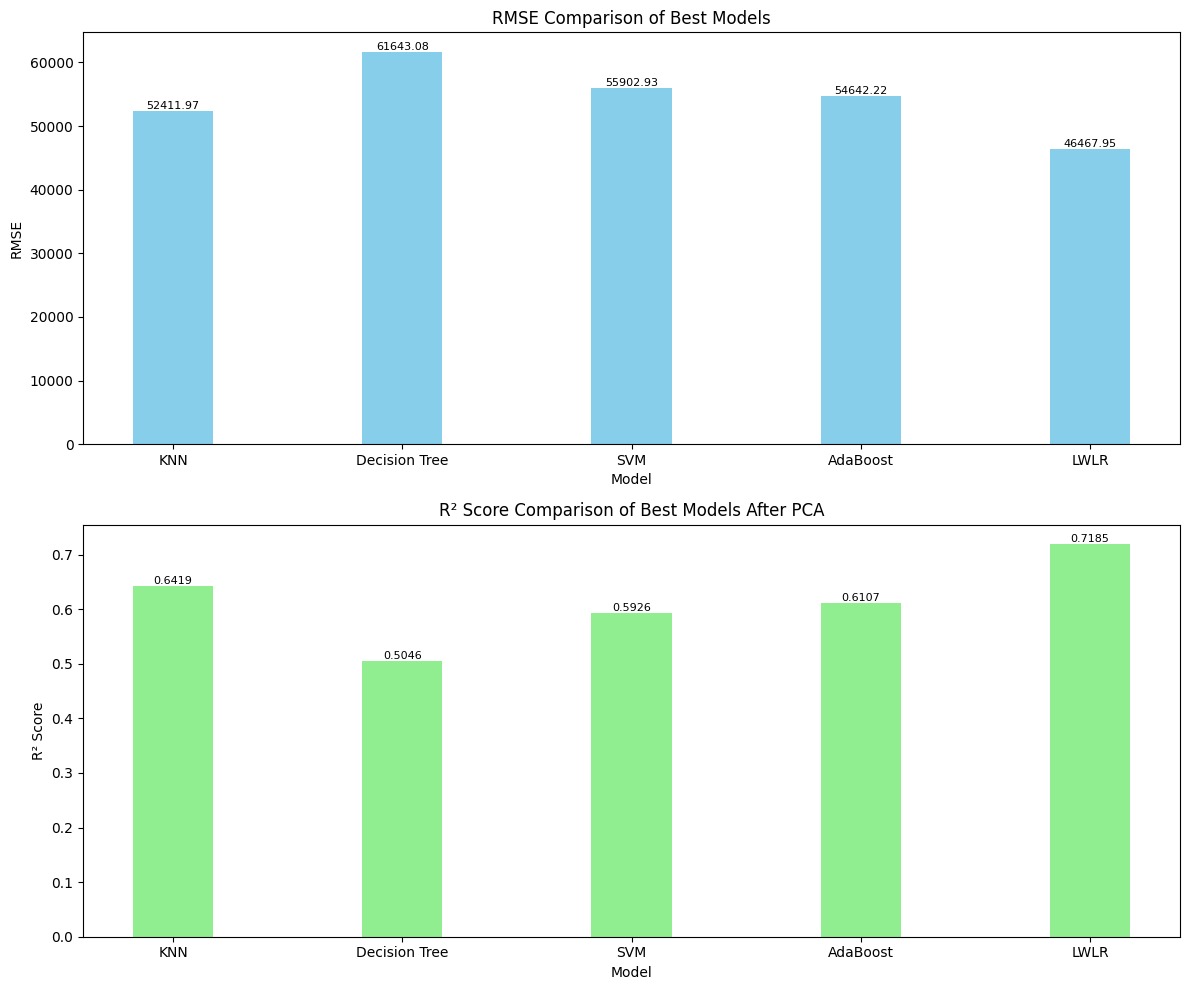

In [145]:
models = ['KNN', 'Decision Tree', 'SVM', 'AdaBoost', 'LWLR']
rmse_values = [rmse_knn_pca,rmse_dt_pca,rmse_svr_pca,rmse_ada_pca,rmse_lwlr_pca]  # Replace with actual RMSE values
r2_values = [r2_knn_pca, r2_dt_pca, r2_svr_pca, r2_ada_pca, r2_lwlr_pca]        # Replace with actual R² values

# Set up the bar width and positions
bar_width = 0.35
index = np.arange(len(models))

# Plotting RMSE comparison
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# RMSE Bar plots
bars_rmse = ax[0].bar(index, rmse_values, bar_width, color='skyblue')

# Add values above RMSE bars
for bar in bars_rmse:
    height = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom', fontsize=8)

# Add labels and title to the RMSE plot
ax[0].set_xlabel('Model')
ax[0].set_ylabel('RMSE')
ax[0].set_title('RMSE Comparison of Best Models')
ax[0].set_xticks(index)
ax[0].set_xticklabels(models)

# R² Bar plots
bars_r2 = ax[1].bar(index, r2_values, bar_width, color='lightgreen')

# Add values above R² bars
for bar in bars_r2:
    height = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom', fontsize=8)

# Add labels and title to the R² plot
ax[1].set_xlabel('Model')
ax[1].set_ylabel('R² Score')
ax[1].set_title('R² Score Comparison of Best Models After PCA')
ax[1].set_xticks(index)
ax[1].set_xticklabels(models)

# Display the plots
plt.tight_layout()
plt.show()

## Analysis

### 1. RMSE Comparison:
* **KNN (K-Nearest Neighbors):** RMSE of approximately 52411.97, indicating a moderate level of prediction error.
* **Decision Tree:** RMSE of 61643.08, which is the highest among the models, suggesting the largest prediction error.
* **SVM (Support Vector Machine):** RMSE of 55902.93, which is better than Decision Tree but worse than KNN and LWLR.
* **AdaBoost:** RMSE of 54642.22, performing slightly better than SVM but worse than LWLR.
* **LWLR (Locally Weighted Linear Regression):** RMSE of 46467.95, the lowest among all models, indicating the best performance in terms of prediction error.

### 2. R² Score Comparison:
* **KNN:** R² of 0.6419, indicating that the model explains about 64.2% of the variance in the data.
* **Decision Tree:** R² of 0.5046, the lowest among the models, explaining only 50.5% of the variance.
* **SVM:** R² of 0.5926, slightly better than Decision Tree but worse than KNN and LWLR.
* **AdaBoost:** R² of 0.6107, explaining 61.1% of the variance, making it better than SVM but worse than LWLR.
* **LWLR:** R² of 0.7185, the highest among all models, indicating that this model explains about 71.85% of the variance.


**Best Model:** LWLR (Locally Weighted Linear Regression) performed the best after applying PCA, achieving the lowest RMSE and the highest R² score. This indicates that LWLR has the best balance of accuracy and explanatory power among the models tested.

**Moderate Performers:** KNN and AdaBoost had moderate performance, with KNN having a slightly higher RMSE but better R² compared to AdaBoost.

**Weaker Models:** SVM and Decision Tree performed the worst, with Decision Tree having the highest RMSE and the lowest R², indicating it is the least effective model for this data.
These results suggest that LWLR is the most suitable model for predicting house prices in this scenario, with KNN and AdaBoost being reasonable alternatives. The Decision Tree model, however, may need further tuning or reconsideration as its performance is suboptimal.

# SUBMISSION

First, we will process the test data entirely and exactly as we did with the train data.

In [146]:
X_test = HouseP_test.drop(columns=['Id', 'SalePrice'], errors='ignore')  
numerical_cols = X_test.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_test.select_dtypes(include=['object', 'bool']).columns
ct = ColumnTransformer([
    ("encoding", OrdinalEncoder(), categorical_cols),
    ("standard", MinMaxScaler(), numerical_cols)
])
X_test_encoded = pd.DataFrame(ct.fit_transform(X_test), columns=X_train.columns)

X_test_pca = pca.transform(X_test_encoded) 

In [147]:
X_test_arr = np.asarray(X_test_encoded)
X_test_arr_pca  = np.asarray(X_test_pca)
# Make predictions for all models before PCA
y_pred_knn = gscv_knn.best_estimator_.predict(X_test_encoded)
y_pred_dt = gscv_dt.best_estimator_.predict(X_test_encoded)
y_pred_svr = gscv_svr.best_estimator_.predict(X_test_encoded)
y_pred_ada = gscv_ada.best_estimator_.predict(X_test_encoded)
y_pred_lwlr = gscv_lwlr.best_estimator_.predict(X_test_arr)

# Make predictions for all models after PCA
y_pred_knn_pca = gscv_knn_pca.predict(X_test_pca)
y_pred_dt_pca = gscv_dt_pca.best_estimator_.predict(X_test_pca)
y_pred_svr_pca = gscv_svr_pca.best_estimator_.predict(X_test_pca)
y_pred_ada_pca = gscv_ada_pca.best_estimator_.predict(X_test_pca)
y_pred_lwlr_pca = gscv_lwlr_pca.best_estimator_.predict(X_test_arr_pca)

In [154]:
ids = ids.ravel()  # or ids.ravel()

# KNN (Pre-PCA)
knn_pred = gscv_knn.best_estimator_.predict(X_test_encoded)
submission_knn = pd.DataFrame({
    'Id': ids,  # Make sure 'Id' corresponds to your test set IDs
    'SalePrice': knn_pred
})
submission_knn.to_csv('submission_knn.csv', index=False)

# Decision Tree (Pre-PCA)
dt_pred = gscv_dt.best_estimator_.predict(X_test_encoded)
submission_dt = pd.DataFrame({
    'Id': ids,
    'SalePrice': dt_pred
})
submission_dt.to_csv('submission_dt.csv', index=False)

# SVR (Pre-PCA)
svr_pred = gscv_svr.best_estimator_.predict(X_test_encoded)
submission_svr = pd.DataFrame({
    'Id':ids,
    'SalePrice': svr_pred
})
submission_svr.to_csv('submission_svr.csv', index=False)

# AdaBoost (Pre-PCA)
ada_pred = gscv_ada.best_estimator_.predict(X_test_encoded)
submission_ada = pd.DataFrame({
    'Id': ids,
    'SalePrice': ada_pred
})
submission_ada.to_csv('submission_ada.csv', index=False)

# LWLR (Pre-PCA)
lwlr_pred = gscv_lwlr.best_estimator_.predict(X_test_arr)
lwlr_pred = lwlr_pred.flatten()
submission_lwlr = pd.DataFrame({
    'Id': ids,
    'SalePrice': lwlr_pred
})
submission_lwlr.to_csv('submission_lwlr.csv', index=False)


In [160]:
# KNN (Post-PCA)
knn_pca_pred = gscv_knn_pca.best_estimator_.predict(X_test_pca)
submission_knn_pca = pd.DataFrame({
    'Id': ids,
    'SalePrice': knn_pca_pred
})
submission_knn_pca.to_csv('submission_knn_pca.csv', index=False)

# Decision Tree (Post-PCA)
dt_pca_pred = gscv_dt_pca.best_estimator_.predict(X_test_pca)
submission_dt_pca = pd.DataFrame({
    'Id': ids,
    'SalePrice': dt_pca_pred
})
submission_dt_pca.to_csv('submission_dt_pca.csv', index=False)

# SVR (Post-PCA)
svr_pca_pred = gscv_svr_pca.best_estimator_.predict(X_test_pca)
submission_svr_pca = pd.DataFrame({
    'Id': ids,
    'SalePrice': svr_pca_pred
})
submission_svr_pca.to_csv('submission_svr_pca.csv', index=False)

# AdaBoost (Post-PCA)
ada_pca_pred = gscv_ada_pca.best_estimator_.predict(X_test_pca)
submission_ada_pca = pd.DataFrame({
    'Id': ids,
    'SalePrice': ada_pca_pred
})
submission_ada_pca.to_csv('submission_ada_pca.csv', index=False)

# LWLR (Post-PCA)
lwlr_pca_pred = gscv_lwlr_pca.best_estimator_.predict(X_test_arr_pca)
lwlr_pca_pred = lwlr_pca_pred.flatten()
submission_lwlr_pca = pd.DataFrame({
    'Id': ids,
    'SalePrice': lwlr_pca_pred
})
submission_lwlr_pca.to_csv('submission_lwlr_pca.csv', index=False)


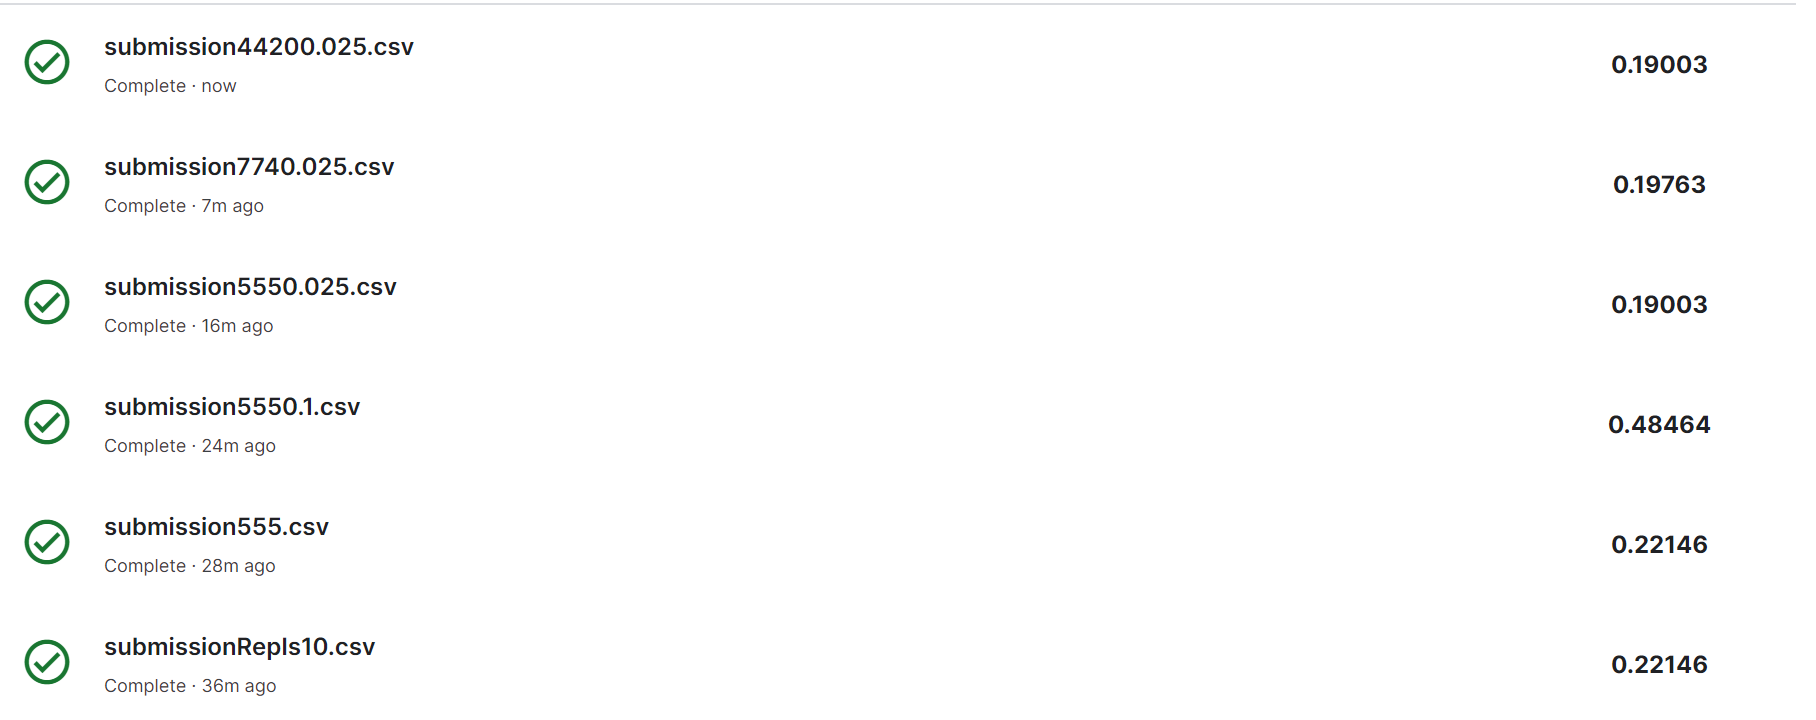

**Summary**

We used KNN instead of SGDregressor, afterwards we used PCA to try and get better predictions, afterwards we used hyper parameters as-well and finally we used ada boosting as out ensemble method.

# References

**scikit-learn:**

https://scikit-learn.org/stable/

**Notebooks I was inspired by:**

https://www.kaggle.com/faressayah/linear-regression-house-price-prediction

**moodle 4th-6th practice notebooks**

In [ ]:
#!pip install nbconvert
#!jupyter nbconvert --to html /content/housePrices208700104_209340587.ipynb